In [1]:
#Task 1: Data Preparation

#importing CSV data from the file 
import pandas as pd
import numpy as np
automobile_set='Automobile.csv'
automobile=pd.read_csv(automobile_set,sep='#',decimal='.',header=None,names=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price'])

#checking whether the loaded data is equivalent to the data in the source CSV file.
automobile.dtypes
automobile.head(238)

# cleaning the data by using different techniques.

#1. Duplicate Values 
#Finding duplicate values
automobile.duplicated(subset=None, keep='first').sum()
#droping duplicate values
automobile=automobile.drop_duplicates()

#2. White Spaces
#stripping of white spaces
automobile['num-of-cylinders'] = automobile['num-of-cylinders'].str.strip()
automobile['num-of-doors'] = automobile['num-of-doors'].str.strip()
automobile['make'] = automobile['make'].str.strip()
automobile['drive-wheels'] = automobile['drive-wheels'].str.strip()
automobile['engine-location'] = automobile['engine-location'].str.strip()
automobile['fuel-type'] = automobile['fuel-type'].str.strip()
automobile['body-style'] = automobile['body-style'].str.strip()
automobile['fuel-system'] = automobile['fuel-system'].str.strip()
automobile['engine-type']=automobile['engine-type'].str.strip()
automobile['aspiration'] = automobile['aspiration'].str.strip()

#3. Data Entry Errors(Typos)
#replacing the values
automobile['num-of-cylinders'].replace('Four', 'four', inplace=True)
automobile['aspiration'].replace('turrrrbo', 'turbo', inplace=True)
automobile['aspiration'].replace('Std', 'std', inplace=True)
automobile['num-of-doors'].replace('fourR','four',inplace=True)
automobile['num-of-doors'].replace('Four','four',inplace=True)
automobile['make'].replace('alfa-romero','Alfa Romeo',inplace=True)
automobile['make'].replace('vol00112ov','volvo',inplace=True)
automobile['make'].replace('Peugot','Peugeot',inplace=True)
automobile['make'].replace('peugot','Peugeot',inplace=True)
automobile['drive-wheels'].replace('Fwd','fwd',inplace=True)
automobile['engine-location'].replace('FRONT','front',inplace=True)
automobile['engine-location'].replace('Front','front',inplace=True)
automobile['engine-location'].replace('REAR','rear',inplace=True)
automobile['engine-location'].replace('Rear','rear',inplace=True)
automobile['fuel-type'].replace('Gas','gas',inplace=True)
automobile['fuel-type'].replace('Diesel','diesel',inplace=True)
automobile['body-style'].replace('Sedan','sedan',inplace=True)
automobile['body-style'].replace('Wagon','wagon',inplace=True)
automobile['make'].replace('Nissan','nissan',inplace=True)
automobile['engine-type'].replace('dohcv','dohc',inplace=True)
automobile['engine-type'].replace('Ohc','ohc',inplace=True)
automobile['engine-type'].replace('ohcv','ohc',inplace=True)
automobile['fuel-system'].replace('Mpfi','mpfi',inplace=True)

#4. NaN and missing values
#4.1 Missing values in normalized-losses using masks
#convertible
mask=(automobile['body-style']=="convertible")
avg_filler=automobile.loc[mask,'normalized-losses'].mean()
automobile.loc[automobile['normalized-losses'].isnull()&mask,'normalized-losses']=avg_filler
#hardtop
mask1=(automobile['body-style']=="hardtop")
avg_filler=automobile.loc[mask1,'normalized-losses'].mean()
automobile.loc[automobile['normalized-losses'].isnull()&mask1,'normalized-losses']=avg_filler
#hatchback
mask2=(automobile['body-style']=="hatchback")
avg_filler=automobile.loc[mask2,'normalized-losses'].mean()
automobile.loc[automobile['normalized-losses'].isnull()&mask2,'normalized-losses']=avg_filler
#sedan
mask3=(automobile['body-style']=="sedan")
avg_filler=automobile.loc[mask3,'normalized-losses'].mean()
automobile.loc[automobile['normalized-losses'].isnull()&mask3,'normalized-losses']=avg_filler
#wagon
mask4=(automobile['body-style']=="wagon")
avg_filler=automobile.loc[mask4,'normalized-losses'].mean()
automobile.loc[automobile['normalized-losses'].isnull()&mask4,'normalized-losses']=avg_filler
#rounding off the values
automobile['normalized-losses']=automobile['normalized-losses'].round()
#4.2 Missing values in number of doors
automobile['num-of-doors']=automobile['num-of-doors'].fillna('four')
#4.3 Missing values in bore
#for fuel-system for mpfi
mask_b=(automobile['fuel-system']=="mpfi")&(automobile['compression-ratio']==9.40)
avg_filler=automobile.loc[mask_b,'bore'].mean()
automobile.loc[automobile['bore'].isnull()&mask_b,'bore']=avg_filler
#for fuel-system for 44bl
mask8=(automobile['compression-ratio']==9.40)
avg_filler=automobile.loc[mask8,'bore'].mean()
automobile.loc[automobile['bore'].isnull()&mask8,'bore']=avg_filler
#4.4 Missing values in horsepower
automobile['horsepower'].fillna(automobile['horsepower'].mean(axis=0), inplace=True)
#rounding off the values
automobile['horsepower']=automobile['horsepower'].round(2)
#4.5 Missing values in stroke
automobile['stroke'].fillna(automobile['stroke'].mean(axis=0), inplace=True)
#rounding off values 
automobile['stroke']=automobile['stroke'].round(2)
#saving the file as a csv
automobile.to_csv('Automobile_default.csv')
#4.6 missing values in price using masks
#isuzu-sedan
mask_i=(automobile['make']=="isuzu")&(automobile['body-style']=="sedan")
avg_filler=automobile.loc[mask_i,'price'].mean()
automobile.loc[automobile['price'].isnull()&mask_i,'price']=avg_filler
#porsche-hatchback
mask_h=(automobile['make']=="porsche")&(automobile['body-style']=="hatchback")
avg_filler=automobile.loc[mask_h,'price'].mean()
automobile.loc[automobile['price'].isnull()&mask_h,'price']=avg_filler
#audi
mask_z=(automobile['make']=="audi")
avg_filler=automobile.loc[mask_z,'price'].mean()
automobile.loc[automobile['price'].isnull()&mask_z,'price']=avg_filler
#volvo-gas
mask_g=(automobile['make']=="volvo")&(automobile['fuel-type']=="gas")
avg_filler=automobile.loc[mask_g,'price'].mean()
automobile.loc[automobile['price'].isnull()&mask_g,'price']=avg_filler
#volvo-diesel
mask_d=(automobile['make']=="volvo")&(automobile['fuel-type']=="diesel")
avg_filler=automobile.loc[mask_d,'price'].mean()
automobile.loc[automobile['price'].isnull()&mask_d,'price']=avg_filler
#replacing 0 with null and filling with mean value
automobile.loc[automobile.symboling==4,'symboling']=np.nan
automobile['symboling'].fillna(0,inplace=True)

#5 Changing datatype of symboling
automobile['symboling'] = automobile.symboling.astype(int)

#6 Duplicate Values
#finding duplicates
automobile.duplicated(subset=None, keep='first').sum()
#dropping duplicates
automobile=automobile.drop_duplicates()
#saving the file as a csv
automobile.to_csv('Automobile_default.csv')
automobile.head(215)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,138.0,Alfa Romeo,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495.000000
1,3,138.0,Alfa Romeo,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500.000000
2,1,132.0,Alfa Romeo,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.000000
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.000000
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.000000
5,2,118.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250.000000
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.000000
7,1,88.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920.000000
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.000000
9,0,132.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160.0,5500.0,16,22,17859.166667


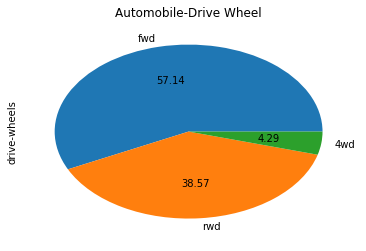

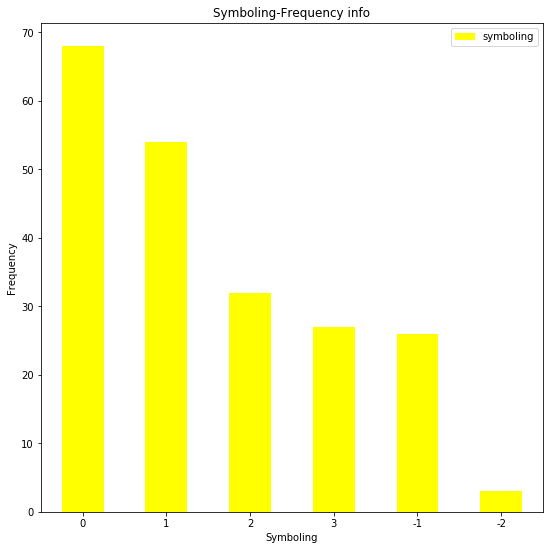

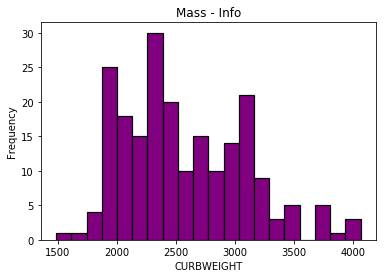

In [2]:
# Task 2: Data Exploration
#import matplotlib.pyplot
import matplotlib.pyplot as plt
%matplotlib inline

#Tast 2.1:
# 1. Nominal 
automobile['drive-wheels'].value_counts().plot(kind='pie',title='Automobile-Drive Wheel',autopct='%0.2f')  
plt.show()

# 2. Ordinal
df=automobile['symboling'].value_counts()
df=pd.DataFrame(df)
df.plot.bar(figsize=(9,9),title='Symboling-Frequency info',color='yellow')
plt.xlabel('Symboling')
plt.ylabel('Frequency')
plt.xticks(rotation='horizontal')
plt.show()

# 3. Numeric
automobile['curb-weight'].plot(kind='hist',color='purple',edgecolor='black',linewidth=1.2,bins=20)
plt.title('Mass - Info')
plt.xlabel('CURBWEIGHT')
plt.show()






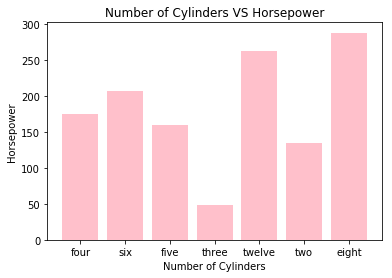

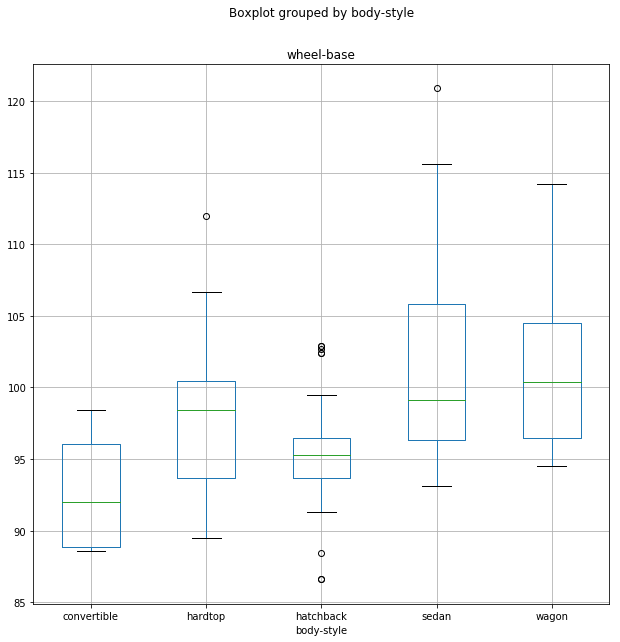

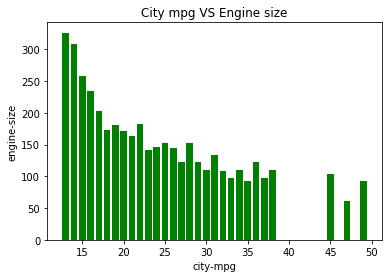

In [5]:
# Task 2: Data Exploration
# Task 2.2:
# 2.2.1: Number of Cyliner VS Horsepower
plt.bar(automobile['num-of-cylinders'],automobile['horsepower'],color='pink',align='center')
plt.ylabel('Horsepower')
plt.xlabel('Number of Cylinders')
plt.title('Number of Cylinders VS Horsepower')
plt.show()

#2.2.2: Wheel base VS Model-style
automobile.boxplot(column='wheel-base',by='body-style',figsize=(10,10))
plt.show()

#2.2.3: City mpg VS Engine size
plt.bar(automobile['city-mpg'],automobile['engine-size'],color='green',align='center')
plt.ylabel('engine-size')
plt.xlabel('city-mpg')
plt.title('City mpg VS Engine size')
plt.show()




/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


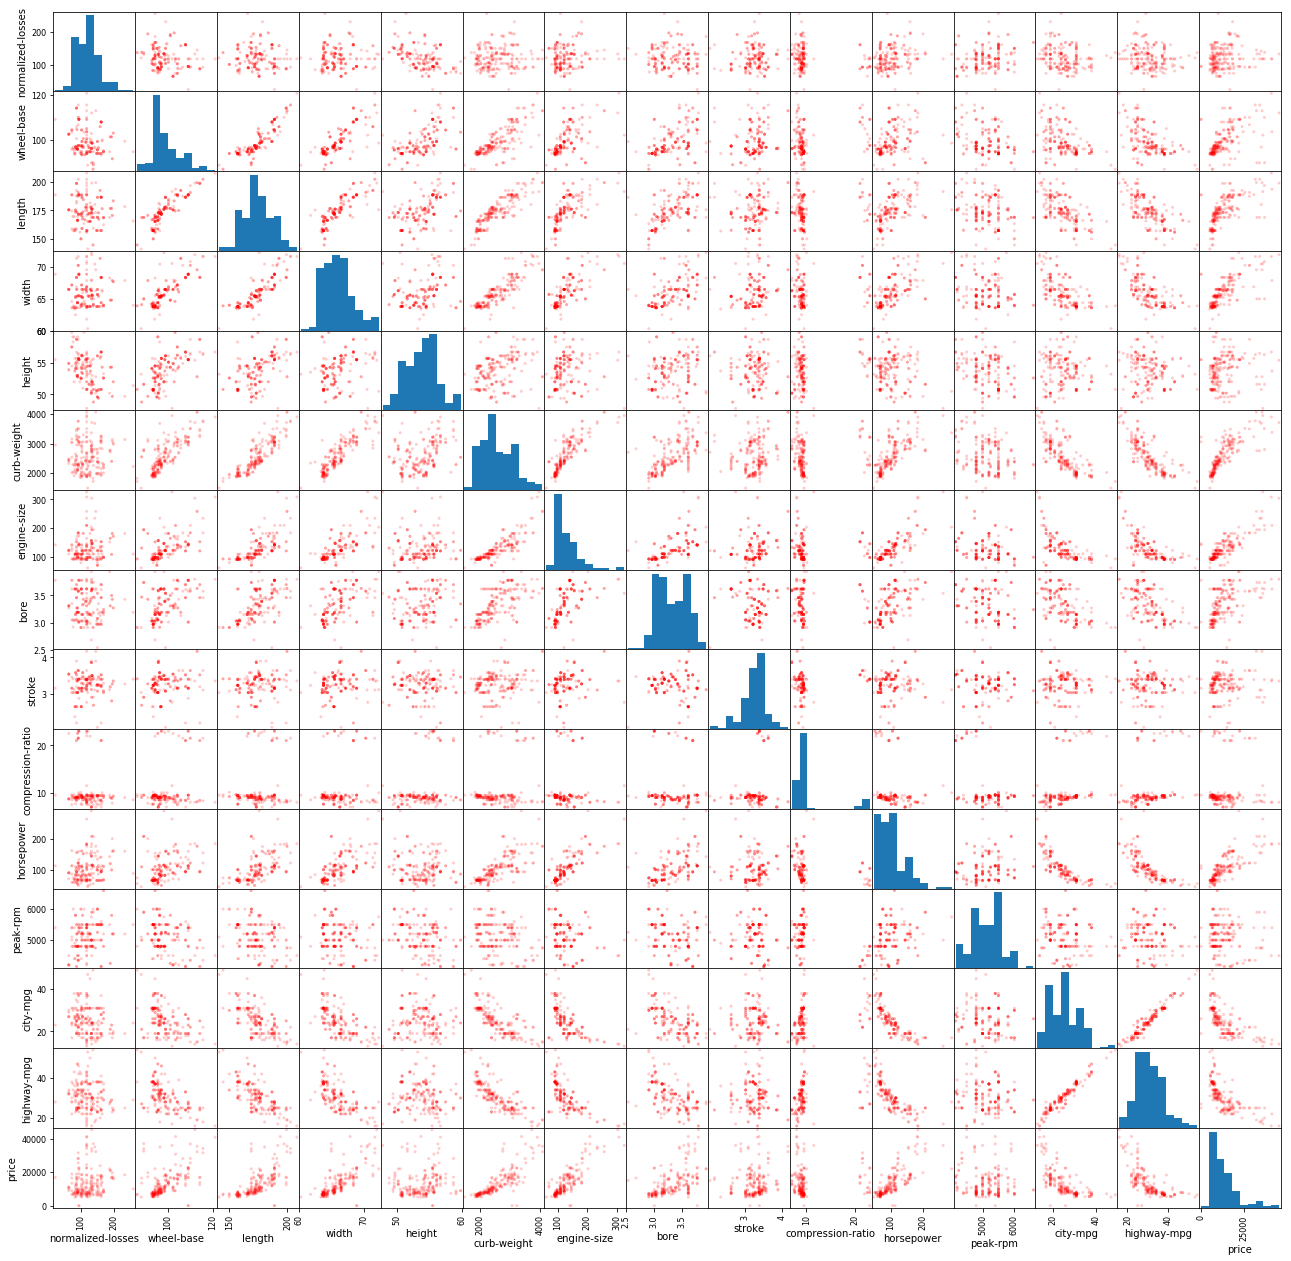

In [4]:
# Task 2: Data Exploration
# Task 2.3. Scatter matrix for all numerical columns

from pandas.tools.plotting import scatter_matrix
smatrix=automobile[['normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']].copy()
scatter_matrix(smatrix,alpha=0.2,figsize=(22,22),diagonal='hist',color=('red'))
plt.show()